In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
d=pd.read_csv('equipment_anomaly_data.csv')
d

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0
...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0


In [4]:
d['faulty'].unique()

array([0., 1.])

In [5]:
le=LabelEncoder()
d['equipment']=le.fit_transform(d['equipment'])
d['location']=le.fit_transform(d['location'])
d['faulty']=le.fit_transform(d['faulty'])


In [6]:
d

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,2,0,0
1,75.740712,22.954018,2.338095,41.867407,0,1,0
2,71.358594,27.276830,1.389198,58.954409,2,4,0
3,71.616985,32.242921,1.770690,40.565138,1,0,0
4,66.506832,45.197471,0.345398,43.253795,1,3,0
...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,1,3,0
7668,63.005855,45.164234,1.264585,61.905390,1,3,0
7669,72.029230,34.757896,1.709046,49.972917,1,0,0
7670,107.086485,23.754114,1.142522,23.967977,0,0,1


In [7]:
d.dtypes

temperature    float64
pressure       float64
vibration      float64
humidity       float64
equipment        int32
location         int32
faulty           int64
dtype: object

In [8]:
d.isnull().sum()

temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64

# Data Visualization

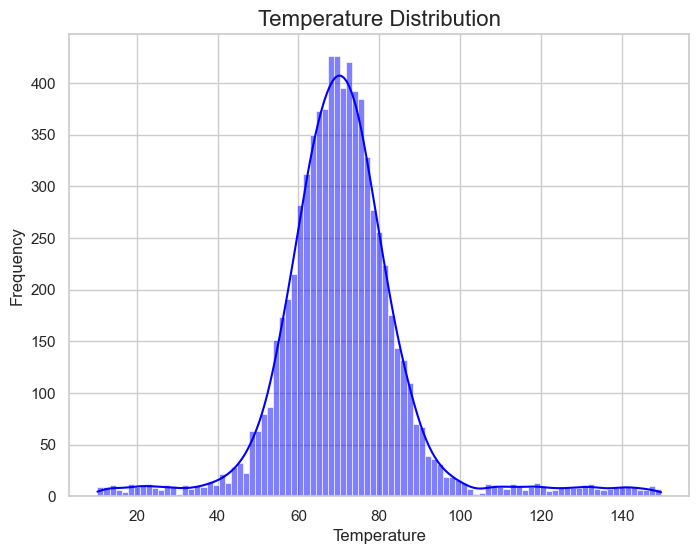

In [9]:
#  Equipment Failure by temperature
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(d['temperature'], kde=True, color="blue")
plt.title("Temperature Distribution", fontsize=16)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

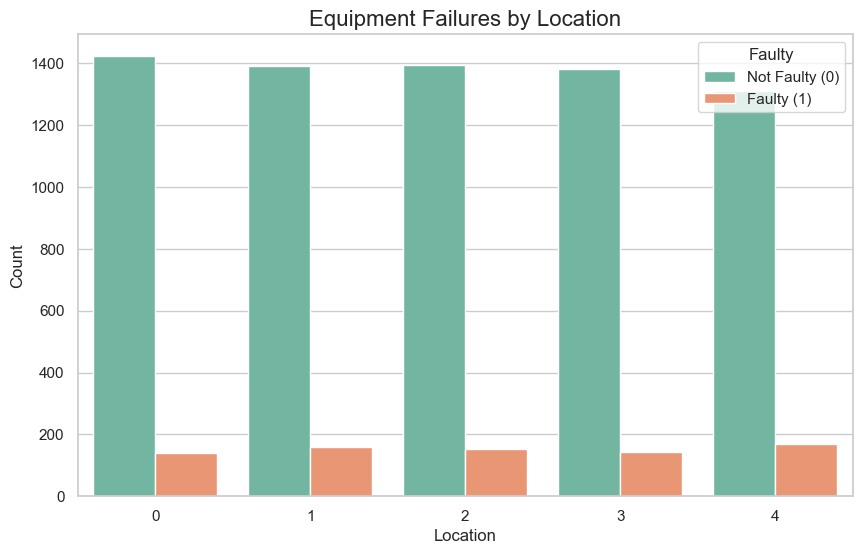

In [10]:
# Visualization 2: Equipment Failure by Location
plt.figure(figsize=(10, 6))
sns.countplot(x='location', hue='faulty', data=d, palette='Set2')
plt.title("Equipment Failures by Location", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Faulty", labels=["Not Faulty (0)", "Faulty (1)"])
plt.show()


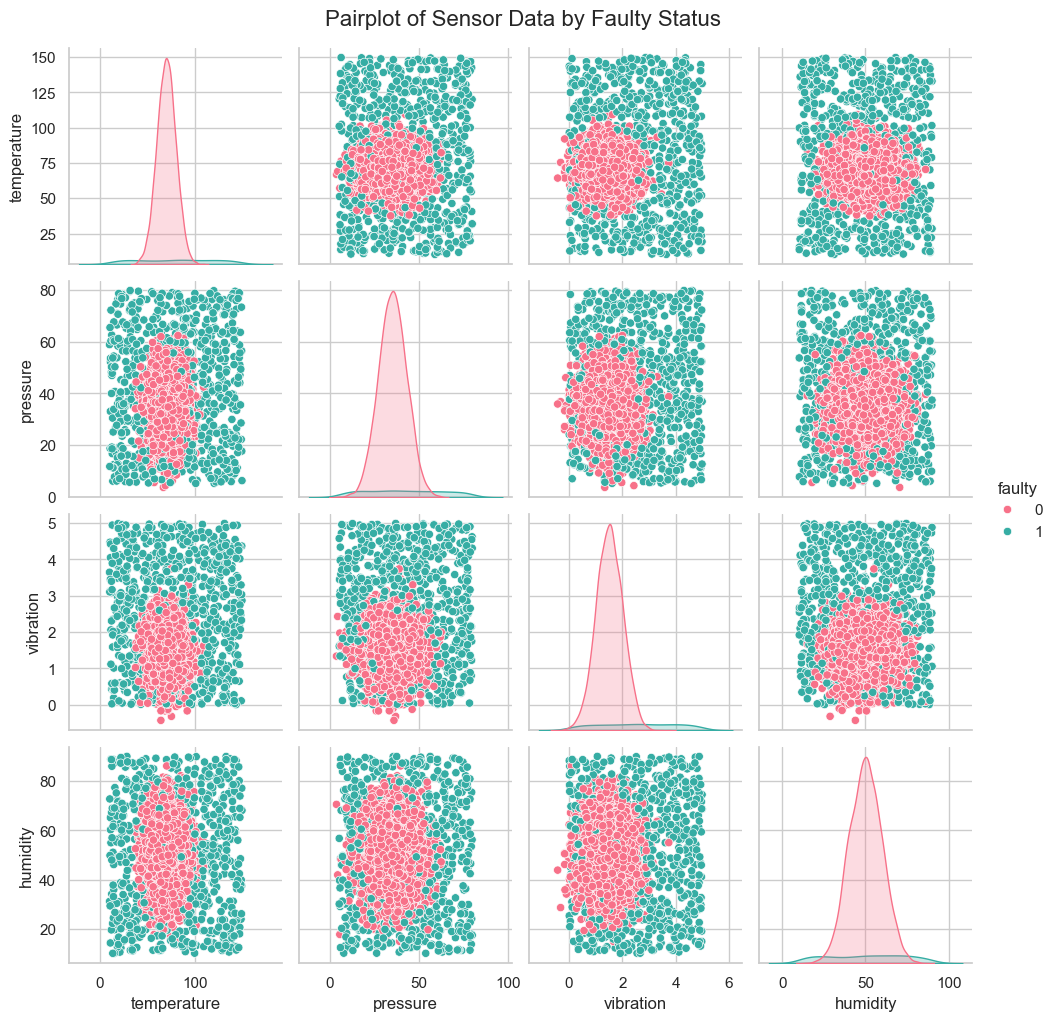

In [11]:
# Visualization 3: Pairplot for Sensor Data
sns.pairplot(d, vars=['temperature', 'pressure', 'vibration', 'humidity'], hue='faulty', palette='husl', diag_kind='kde', height=2.5)
plt.suptitle("Pairplot of Sensor Data by Faulty Status", y=1.02, fontsize=16)
plt.show()

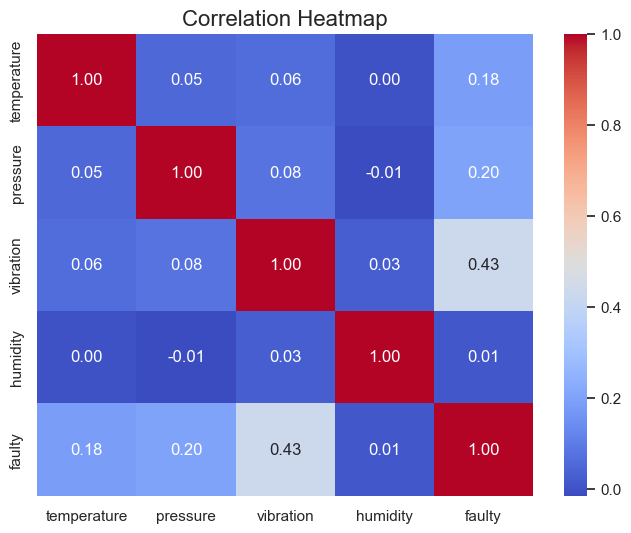

In [12]:
# Visualization 4: Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = d[['temperature', 'pressure', 'vibration', 'humidity', 'faulty']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

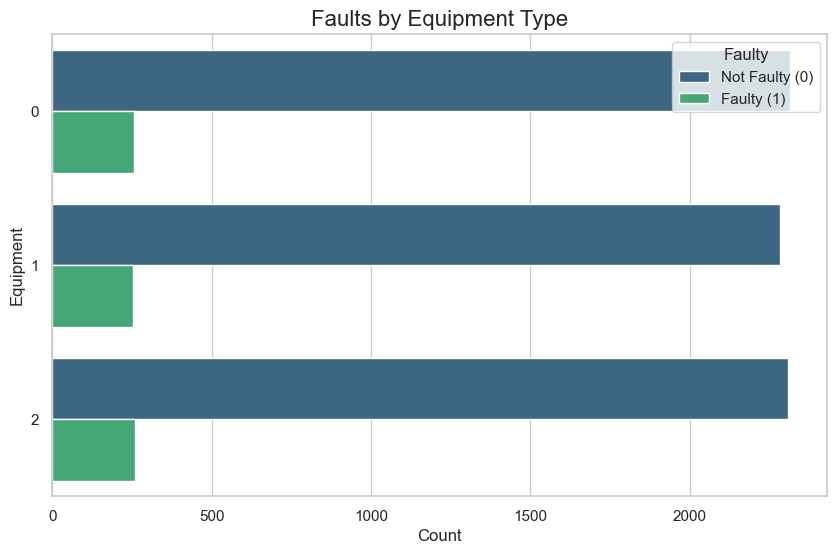

In [13]:
# Visualization 5: Equipment Type vs. Faults
plt.figure(figsize=(10, 6))
sns.countplot(y='equipment', hue='faulty', data=d, palette='viridis')
plt.title("Faults by Equipment Type", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Equipment", fontsize=12)
plt.legend(title="Faulty", labels=["Not Faulty (0)", "Faulty (1)"])
plt.show()

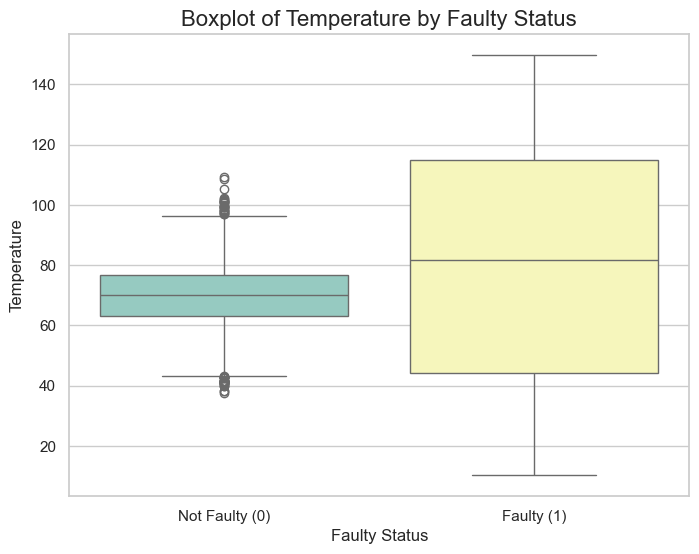

In [14]:
# Visualization 6: Boxplot of Sensor Data by Faulty Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='faulty', y='temperature', data=d, palette='Set3')
plt.title("Boxplot of Temperature by Faulty Status", fontsize=16)
plt.xlabel("Faulty Status", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.xticks([0, 1], ['Not Faulty (0)', 'Faulty (1)'])
plt.show()

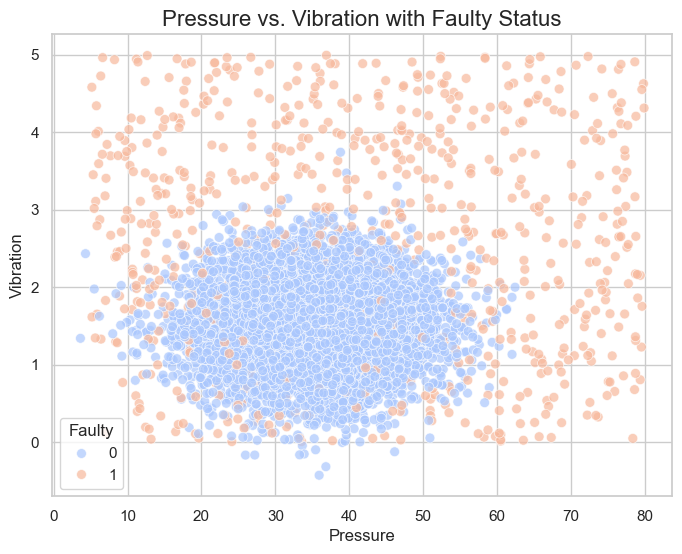

In [15]:
# Visualization 7: Scatter Plot for Two Key Features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pressure', y='vibration', hue='faulty', data=d, palette='coolwarm', s=50, alpha=0.7)
plt.title("Pressure vs. Vibration with Faulty Status", fontsize=16)
plt.xlabel("Pressure", fontsize=12)
plt.ylabel("Vibration", fontsize=12)
plt.legend(title="Faulty")
plt.show()

In [16]:
x=d.drop('faulty',axis=1)
y=d['faulty']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
model=LogisticRegression()

In [19]:
model.fit(x_train,y_train)

LogisticRegression()

In [20]:
model.score(x_test,y_test)

0.9327424400417101

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt_model= DecisionTreeClassifier()

In [23]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt_model.score(x_train,y_train)

1.0

In [25]:
dt_model.score(x_test,y_test)

0.97288842544317

# Random Forest Classsifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model= RandomForestClassifier(n_estimators=50,random_state=20)

In [28]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=20)

In [29]:
rf_model.score(x_train,y_train)

1.0

In [30]:
rf_model.score(x_test,y_test)

0.9827945776850886

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_model= KNeighborsClassifier()

In [33]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knn_model.score(x_train,y_train)

0.9767118526242614

In [35]:
knn_model.score(x_test,y_test)

0.9754953076120959

# SVM

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [37]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train

array([[-1.89727975e-01,  6.36933120e-01,  1.89673371e-01,
        -7.25292028e-02, -6.38470028e-04,  1.47223548e-02],
       [-9.06721889e-01,  2.09675294e+00,  3.58029172e-01,
        -4.19596282e-02, -1.22522398e+00,  7.26591512e-01],
       [ 6.82126961e-01, -1.35395430e+00, -5.64396053e-01,
        -2.52307572e-01, -1.22522398e+00, -1.40901596e+00],
       ...,
       [-4.58664256e-01,  4.29515547e-01, -9.85183622e-01,
         2.59201814e-01, -1.22522398e+00, -6.97146802e-01],
       [-5.02300896e-01,  2.14625909e-01,  1.33249554e+00,
         1.60303529e+00, -6.38470028e-04,  1.47223548e-02],
       [ 1.40714452e+00,  1.98872825e+00, -1.11280375e+00,
        -9.46394622e-01, -1.22522398e+00,  1.47223548e-02]])

In [38]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9327424400417101

In [39]:
svm.score(x_train,y_train)

0.9386513729579423

In [40]:
svm1=SVC(kernel='poly',degree=3,C=5,gamma='auto')  
svm1.fit(x_train,y_train)
svm1.score(x_test,y_test)

0.9530761209593326

In [41]:
svm1.score(x_train,y_train)

0.9602015988877303

In [42]:
svm2=SVC(kernel='sigmoid')
svm2.fit(x_train,y_train)
svm2.score(x_test,y_test)

0.8044838373305526

In [43]:
svm2.score(x_train,y_train)

0.8147375738616615

In [44]:
svm3=SVC(kernel='rbf')
svm3.fit(x_train,y_train)
svm3.score(x_test,y_test)

0.9827945776850886

In [45]:
svm3.score(x_train,y_train)

0.9878345498783455

In [46]:
svm4=SVC()
svm4.fit(x_train,y_train)
svm4.score(x_test,y_test)

0.9827945776850886

In [47]:
svm4.score(x_train,y_train)

0.9878345498783455

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gn_model=GaussianNB()

In [50]:
gn_model.fit(x_train,y_train)

GaussianNB()

In [51]:
gn_model.score(x_train,y_train)

0.9854014598540146

In [52]:
gn_model.score(x_test,y_test)

0.986444212721585

# Ensemble Model

#AdaaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
adaboost= AdaBoostClassifier(n_estimators=400,learning_rate=0.3,random_state=10)

In [55]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=400, random_state=10)

In [56]:
adaboost.score(x_train,y_train)

0.9880083420229405

In [57]:
adaboost.score(x_test,y_test)

0.9859228362877998

#GradientBoosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
grad_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [60]:
grad_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

In [61]:
grad_model.score(x_train,y_train)

0.9661105318039624

In [62]:
grad_model.score(x_test,y_test)

0.9655891553701773

#XGBClassifier

In [63]:
from xgboost import XGBClassifier

In [64]:
xg_model=XGBClassifier()

In [65]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
xg_model.score(x_train,y_train)

1.0

In [67]:
xg_model.score(x_test,y_test)

0.9822732012513035

# Cross Validation

In [68]:
from sklearn.model_selection import KFold,StratifiedKFold
X=d.drop(['faulty'],axis=1)
y=d[['faulty']]

In [69]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return model.score(x_test,y_test)
    # return accuracy_score(y_test, predictions)

In [70]:
fold = KFold(n_splits=6)
log_score = []
dt_score = []
rf_score = []
knn_score = []
svm_score = []
nb_score = []
adb_score = []
xg_score=[]
gr_score = []

for train_index, test_index in fold.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_score.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeClassifier(max_depth=7), x_train, x_test, y_train, y_test))
    rf_score.append(get_score(RandomForestClassifier(random_state=34), x_train, x_test, y_train, y_test))
    knn_score.append(get_score(KNeighborsClassifier(), x_train, x_test, y_train, y_test))
    svm_score.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    nb_score.append(get_score(GaussianNB(), x_train, x_test, y_train, y_test))
    adb_score.append(get_score(AdaBoostClassifier(), x_train, x_test, y_train, y_test))
    xg_score.append(get_score(XGBClassifier(), x_train, x_test, y_train, y_test))
    gr_score.append(get_score(GradientBoostingClassifier(), x_train, x_test, y_train, y_test))

# You can now analyze the scores stored in the lists
print("Logistic Regression scores:",log_score)
print("Decision Tree scores:",dt_score)
print("Random Forest scores:",rf_score)
print("KNN scores:",knn_score)
print("Naive Bayes scores:",nb_score)
print('SVM score: ',svm_score)
print("AdaBoost scores:",adb_score)
print("XGBoost scores:",xg_score)
print("Gradient Boosting scores:",gr_score)

Logistic Regression scores: [0.9437060203283816, 0.9413604378420641, 0.9382329945269742, 0.9343236903831118, 0.9381846635367762, 0.9397496087636933]
Decision Tree scores: [0.982017200938233, 0.983580922595778, 0.9765441751368257, 0.9757623143080532, 0.97339593114241, 0.9765258215962441]
Random Forest scores: [0.9874902267396404, 0.9874902267396404, 0.9773260359655981, 0.9812353401094606, 0.9804381846635368, 0.9804381846635368]
KNN scores: [0.9741985926505082, 0.9796716184519155, 0.9671618451915559, 0.9718530101641908, 0.9655712050078247, 0.9726134585289515]
Naive Bayes scores: [0.9882720875684128, 0.9890539483971853, 0.9843627834245504, 0.9843627834245504, 0.9827856025039123, 0.9843505477308294]
SVM score:  [0.9812353401094606, 0.9827990617670055, 0.9695074276778733, 0.9702892885066459, 0.9702660406885759, 0.97339593114241]
AdaBoost scores: [0.9851446442533229, 0.9874902267396404, 0.980453479280688, 0.982017200938233, 0.9820031298904538, 0.9788732394366197]
XGBoost scores: [0.982799061

#GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [72]:
model_params={'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10],'max_depth': [None, 10, 20, 30] }}


In [73]:
gds= GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=True)

In [74]:
gds.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [1, 5, 10]},
             return_train_score=True)

In [75]:
gds.best_score_

0.9810752972355898

In [76]:
gds.best_params_

{'max_depth': None, 'n_estimators': 10}

In [77]:
y_pred=gds.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [78]:
y_test

,faulty
6394,0
6395,0
6396,0
6397,0
6398,1
...,...
7667,0
7668,0
7669,0
7670,1


In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
accuracy_score(y_test,y_pred)

0.9788732394366197

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1153
           1       0.95      0.83      0.89       125

    accuracy                           0.98      1278
   macro avg       0.96      0.91      0.94      1278
weighted avg       0.98      0.98      0.98      1278



In [82]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1147,    6],
       [  21,  104]], dtype=int64)

In [83]:
import seaborn as sns

Text(67.25, 0.5, 'predicted')

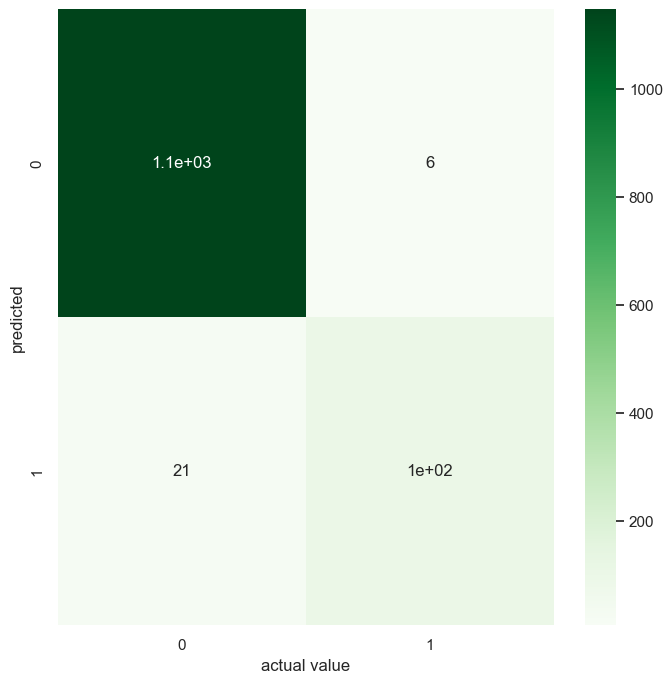

In [84]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap='Greens')
plt.xlabel('actual value')
plt.ylabel('predicted')